In [43]:
import pandas as pd
import datetime as datetime
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
import os
import calendar

# Weather Data

In [17]:
# Get daily 2016 weather data

weather = pd.read_csv('weather_data/weather_data_nyc_centralpark_2016.csv')
weather['date'] = pd.to_datetime(weather['date'], format='%d-%m-%Y')
weather = weather.set_index('date')

In [38]:
weather.head()

,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
date,,,,,,
2016-01-01,42,34,38.0,0.00,0.0,0
2016-01-02,40,32,36.0,0.00,0.0,0
2016-01-03,45,35,40.0,0.00,0.0,0
2016-01-04,36,14,25.0,0.00,0.0,0
2016-01-05,29,11,20.0,0.00,0.0,0


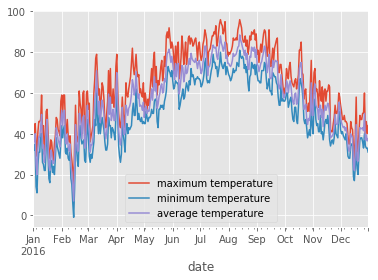

In [19]:
weather.plot()

# Distribution Board Data

In [117]:
# Read distribution board data -- create datetime columns 

board_data = pd.read_csv('distribution_board_data/distribution_bds.csv')
board_data.head()

,time,3rd floor lighting and plugs,4th floor lighting and plugs,"4th floor mechanical 2nd,3rd,5th lighting and plugs",6th floor lighting and plugs,7th floor lighting and plugs,"7th floor mechanical, 8th and 9th lighting and plugs",cellar power and lighting,elevator,retail,roof mechanical,sub-cellar power and lighting
0,2016-01-01 00:00:00,2.0,3.4,12.7,8.5,7.6,18.5,22.9,2.5,32.0,-27.2,101.0
1,2016-01-01 00:01:00,2.0,3.4,12.7,8.5,7.6,18.5,22.9,2.5,32.0,-27.2,101.0
2,2016-01-01 00:02:00,2.0,3.4,12.7,8.5,7.6,18.5,22.9,2.5,32.0,-27.2,101.0
3,2016-01-01 00:03:00,2.0,3.4,12.7,8.5,7.6,18.5,22.9,2.5,32.0,-27.2,101.0
4,2016-01-01 00:04:00,2.0,3.4,12.7,8.5,7.6,18.5,22.9,2.5,32.0,-27.2,101.0


In [118]:
board_data['time'] = pd.to_datetime(board_data['time'])
board_data['date'] = board_data['time'].apply(lambda x: x.date())
board_data['Time'] = board_data['time'].apply(lambda x: x.time())
board_data['year'] = board_data['time'].apply(lambda x: x.year)     
board_data['month'] = board_data['time'].apply(lambda x: x.month)
board_data['day'] = board_data['time'].apply(lambda x: x.day)
board_data['hour'] = board_data['time'].apply(lambda x: x.hour)
board_data['Weekday'] = board_data['time'].apply(lambda x: calendar.day_name[x.weekday()])

In [119]:
board_data['date'] = pd.to_datetime(board_data['date'], format='%Y-%m-%d')
smoothed_board_data = board_data.groupby('date').mean()
smoothed_board_data.head()

,3rd floor lighting and plugs,4th floor lighting and plugs,"4th floor mechanical 2nd,3rd,5th lighting and plugs",6th floor lighting and plugs,7th floor lighting and plugs,"7th floor mechanical, 8th and 9th lighting and plugs",cellar power and lighting,elevator,retail,roof mechanical,sub-cellar power and lighting,year,month,day,hour
date,,,,,,,,,,,,,,,
2016-01-01,2.026667,3.517188,12.550937,8.447153,7.735208,18.235694,25.976562,2.649375,22.586806,-25.040451,101.582396,2016.0,1.0,1.0,11.5
2016-01-02,2.029028,3.606100,11.148981,8.129583,8.381424,14.576725,28.910255,2.652396,12.187326,-25.651933,102.479583,2016.0,1.0,2.0,11.5
2016-01-03,2.021632,3.617182,10.081192,8.141753,8.394468,12.559635,26.742373,2.577708,10.975660,-25.611921,102.110405,2016.0,1.0,3.0,11.5
2016-01-04,2.058449,3.666065,16.314977,8.381042,8.370625,24.383113,32.712882,4.078519,19.428958,119.557535,104.979896,2016.0,1.0,4.0,11.5
2016-01-05,2.042870,3.618275,15.537280,8.377361,8.257812,26.701111,33.549884,3.354201,24.050428,188.296968,105.240937,2016.0,1.0,5.0,11.5


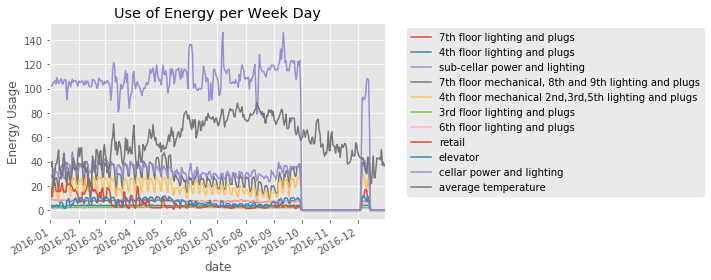

In [56]:
boards = {  '3rd floor lighting and plugs',
            '4th floor lighting and plugs',
            '4th floor mechanical 2nd,3rd,5th lighting and plugs',
            '6th floor lighting and plugs',
            '7th floor lighting and plugs',
            '7th floor mechanical, 8th and 9th lighting and plugs',
            'cellar power and lighting',
            'elevator',
            'retail',
#             'roof mechanical',
            'sub-cellar power and lighting'  }

plt.figure()
plt.title("Use of Energy per Week Day" )
plt.ylabel("Energy Usage")

for board in boards:
    smoothed_board_data[board].plot( legend=board)

weather['average temperature'].plot() 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=1)
plt.show()

# Find correlation coefficient between weather data and energy data

In [112]:
correlations = {}
for board in boards:
    correlations[board] = weather.loc[:'2016-10-1', 'average temperature'].corr(smoothed_board_data[board].loc[:'2016-10-1'])

In [113]:
correlations = pd.DataFrame.from_dict(correlations, orient='index')
correlations.columns = ['correlation']
correlations['correlation'] = abs( correlations['correlation'] )
correlations = correlations.sort_values('correlation', ascending=True)

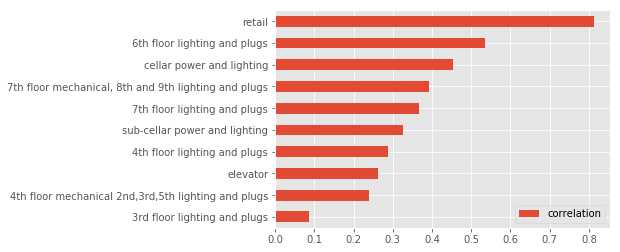

In [114]:
correlations.plot( kind='barh' )